<a href="https://colab.research.google.com/github/NCRibeiro/Aplicativo-LiFE/blob/main/Treinamento_de_redes_neurais_com_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.13.0
!pip install keras==2.13.1

In [2]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir = '/content/drive/MyDrive/dataset_gatos_cachorros'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # Tamanho padrão para muitos modelos pré-treinados
BATCH_SIZE = 32 # Tamanho do lote

train_datagen = ImageDataGenerator(
    rescale=1./255, # Normaliza os pixels para valores entre 0 e 1
    rotation_range=60, # Aumenta a rotação
    width_shift_range=0.4, # Aumenta o deslocamento horizontal
    height_shift_range=0.4, # Aumenta o deslocamento vertical
    shear_range=0.4, # Aplica shear transformation
    zoom_range=0.4, # Aplica zoom nas imagens
    horizontal_flip=True, # Inverte as imagens horizontalmente
    brightness_range=[0.5, 1.5], # Ajusta o brilho
    channel_shift_range=20, # Desloca os canais de cor
    validation_split=0.2 # Separa 20% dos dados para validação
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' if len(os.listdir(data_dir)) == 2 else 'categorical', # Detecta se é classificação binária ou multiclasse
    subset='training',
    seed=42 # Define uma semente para reprodutibilidade
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' if len(os.listdir(data_dir)) == 2 else 'categorical', # Detecta se é classificação binária ou multiclasse
    subset='validation',
    seed=42
)

Found 2128 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [7]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x) # Regularização L2
x = Dropout(0.6)(x)  # Dropout com taxa mais alta
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x) # Regularização L2
x = Dropout(0.6)(x)  # Dropout com taxa mais alta
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy' if train_generator.class_mode == 'binary' else 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping] # Adiciona o callback ao fit
)

Epoch 1/10
67/67 [==============================] - 446s 7s/step - loss: 0.4656 - accuracy: 0.9958 - val_loss: 0.3323 - val_accuracy: 1.0000
Epoch 2/10
67/67 [==============================] - 165s 2s/step - loss: 0.2677 - accuracy: 1.0000 - val_loss: 0.2145 - val_accuracy: 1.0000
Epoch 3/10
67/67 [==============================] - 167s 3s/step - loss: 0.1797 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 1.0000
Epoch 4/10
67/67 [==============================] - 162s 2s/step - loss: 0.1282 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 5/10
67/67 [==============================] - 162s 2s/step - loss: 0.0942 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 1.0000
Epoch 6/10
67/67 [==============================] - 157s 2s/step - loss: 0.0707 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 7/10
67/67 [==============================] - 151s 2s/step - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 8/10
67

Epoch 10/15
67/67 [==============================] - 228s 3s/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 11/15
67/67 [==============================] - 219s 3s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 12/15
67/67 [==============================] - 222s 3s/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 13/15
67/67 [==============================] - 218s 3s/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 14/15
67/67 [==============================] - 225s 3s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 15/15
67/67 [==============================] - 216s 3s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000


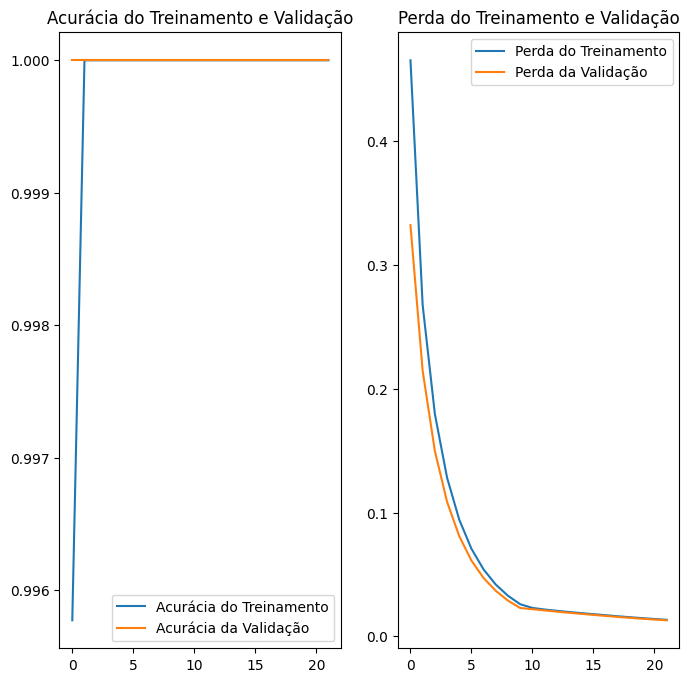

In [10]:
import tensorflow

base_model.trainable = True
fine_tune_at = 100  # Descongela as últimas 20 camadas (exemplo, ajuste conforme necessário)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(loss='categorical_crossentropy' if train_generator.class_mode == 'binary' else 'categorical_crossentropy',
              optimizer=tensorflow.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

history_fine = model.fit(
    train_generator,
    epochs=EPOCHS + 5,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    callbacks=[early_stopping] # Mantém o Early Stopping durante o fine-tuning
)

# Combine os históricos para visualização
acc = history.history['accuracy']
acc += history_fine.history['accuracy']

val_acc = history.history['val_accuracy']
val_acc += history_fine.history['val_accuracy']

loss = history.history['loss']
loss += history_fine.history['loss']
val_loss = history.history['val_loss']
val_loss += history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia do Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia da Validação')
plt.legend(loc='lower right')
plt.title('Acurácia do Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda do Treinamento')
plt.plot(epochs_range, val_loss, label='Perda da Validação')
plt.legend(loc='upper right')
plt.title('Perda do Treinamento e Validação')
plt.show()

In [11]:
# Define the split proportions
train_split = 0.7  # Example: 70% for training
val_split = 0.15  # Example: 15% for validation (test split will be 1 - train_split - val_split)

# Load or create your dataset here
# Example using a list:
# data = list(range(100))
# Example loading from a file:
# import pandas as pd
# data = pd.read_csv('your_file.csv')

# Assuming 'data' is a list or numpy array containing your dataset
# If 'data' is not defined, you need to load or create it first
# Example:
# data = ... (load or create your dataset here)
import numpy as np # importing numpy library
# generating random data of size 1000
data = np.random.rand(1000)
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [12]:
# Instead of:
# x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
# x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
# x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]

# Assuming you want to split the data into features (x) and targets (y)
# and your data is in a single array 'data' like you defined before:

# Reshape the data to have a single feature column
train = train.reshape(-1, 1)  # Reshape train data
val = val.reshape(-1, 1)    # Reshape validation data
test = test.reshape(-1, 1)   # Reshape test data

# Assuming the target variable is the same as the feature (for demonstration)
# You might need to adjust this based on your actual target variable
x_train, y_train = train, train
x_val, y_val = val, val
x_test, y_test = test, test

print(y_test)

[[0.10889931]
 [0.51473855]
 [0.50654071]
 [0.76654391]
 [0.01582411]
 [0.30947191]
 [0.47077166]
 [0.73166908]
 [0.09914865]
 [0.83384158]
 [0.1877555 ]
 [0.52598751]
 [0.10021348]
 [0.60835119]
 [0.53958852]
 [0.16651321]
 [0.39424005]
 [0.64068416]
 [0.35164673]
 [0.4494002 ]
 [0.97896512]
 [0.18865922]
 [0.67195998]
 [0.69979613]
 [0.02688354]
 [0.77284019]
 [0.59490953]
 [0.63748278]
 [0.82921837]
 [0.44738665]
 [0.80746781]
 [0.37700979]
 [0.50907478]
 [0.29301065]
 [0.25548042]
 [0.33790213]
 [0.51884647]
 [0.94621522]
 [0.30082856]
 [0.29428035]
 [0.26437593]
 [0.29700916]
 [0.57883399]
 [0.26518411]
 [0.62833039]
 [0.28345249]
 [0.29749238]
 [0.07747517]
 [0.56109159]
 [0.60355696]
 [0.78911549]
 [0.0392101 ]
 [0.58536846]
 [0.59109956]
 [0.36739999]
 [0.87617013]
 [0.43303094]
 [0.76197925]
 [0.15606383]
 [0.86942248]
 [0.93631928]
 [0.01365498]
 [0.01565847]
 [0.36299445]
 [0.0112833 ]
 [0.91617396]
 [0.97640205]
 [0.83711425]
 [0.41307522]
 [0.16178206]
 [0.26213994]
 [0.67

In [13]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Define num_classes based on the unique values in y_train (or any y)
# This assumes you want to classify based on unique values in your target
num_classes = len(np.unique(y_train))  # Assuming y_train is a 1D array of target labels

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(150, 700)


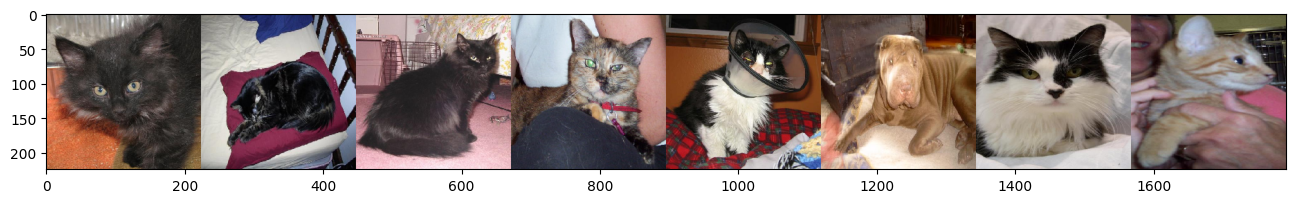

In [14]:
import os
import random
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Define the root directory (replace with your desired path)
root = '/content/drive/MyDrive/dataset_gatos_cachorros' # Assuming you want to use the same data directory

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [15]:
import numpy as np

# Get the original image dimensions from your image data
img_height = 224  # Assuming your images are 224x224
img_width = 224
img_channels = 3  # Assuming RGB images (3 channels)

# Instead of reshaping the randomly generated data, replace it with
# placeholder data of the correct shape if you're not loading real images:
x_train = np.random.rand(700, img_height, img_width, img_channels)
x_val = np.random.rand(150, img_height, img_width, img_channels)
x_test = np.random.rand(150, img_height, img_width, img_channels)

# Normalize data (if needed)
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Create a new Sequential model
new_model = Sequential()  # Create a new model instead of adding to the existing one

new_model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(32, (3, 3)))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Dropout(0.25))

new_model.add(Conv2D(32, (3, 3)))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(32, (3, 3)))
new_model.add(Activation('relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Dropout(0.25))

new_model.add(Flatten())
new_model.add(Dense(256))
new_model.add(Activation('relu'))

new_model.add(Dropout(0.5))

new_model.add(Dense(num_classes))
new_model.add(Activation('softmax'))

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                   

In [16]:
# Compile the model
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Assuming categorical data

# Evaluate the model
loss, accuracy = new_model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 6.550818920135498
Test accuracy: 0.0


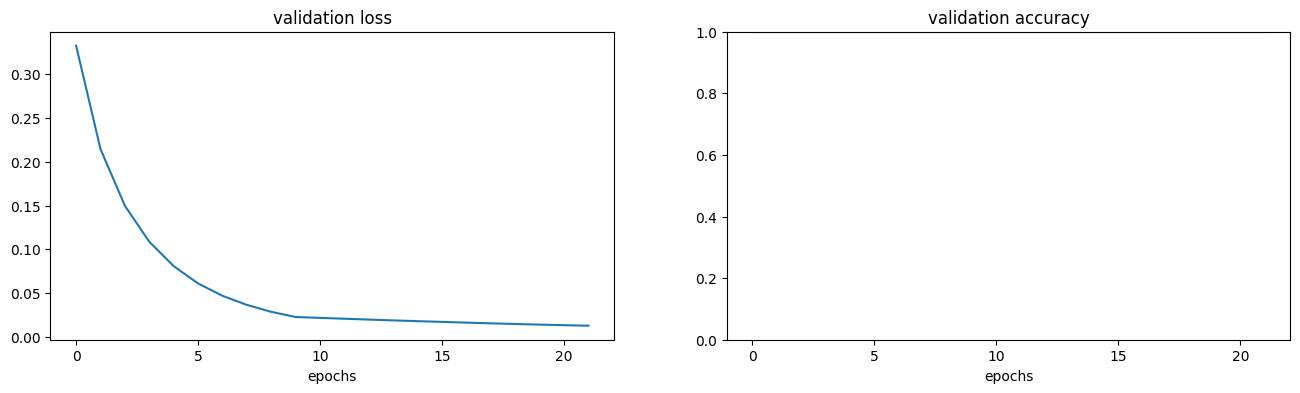

In [17]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
# Change "val_acc" to "val_accuracy" in the following line
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [18]:
# Instead of:
# loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Evaluate the new_model which was compiled.
loss, accuracy = new_model.evaluate(x_test, y_test, verbose=0)

In [19]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [20]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [21]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
6/6 [==============================] - 552s 93s/step - loss: 2.2543 - accuracy: 0.6343 - val_loss: 1.3671e-04 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 597s 103s/step - loss: 3.1089e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 600s 104s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 601s 104s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 546s 93s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 598s 103s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 596s 103s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_los

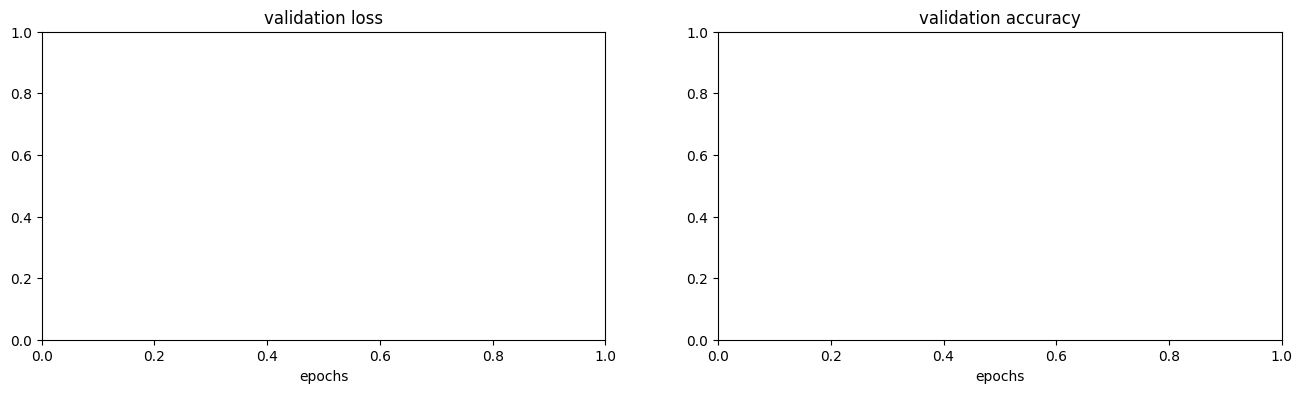

In [3]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot and assign it to the alias 'plt'

# Assuming 'history' and 'history2' were defined in previous cells
# If not, you need to load them or re-run the training code

# Create the figure and subplots
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Try to access the history data, and handle the case where it's not found
try:
    ax.plot(history.history["val_loss"])  # Plot validation loss from 'history'
    ax2.plot(history.history["val_accuracy"])  # Plot validation accuracy from 'history'
except NameError:
    print("Warning: 'history' variable not found. Skipping plots from 'history'.")

try:
    ax.plot(history2.history["val_loss"])  # Plot validation loss from 'history2'
    ax2.plot(history2.history["val_accuracy"])  # Plot validation accuracy from 'history2'
except NameError:
    print("Warning: 'history2' variable not found. Skipping plots from 'history2'.")

# Set titles and labels
ax.set_title("validation loss")
ax.set_xlabel("epochs")
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

# Show the plots
plt.show()

In [23]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0
Test accuracy: 1.0


In [ ]:
img, x = get_image('101_ObjectCategories/airplanes/image_0003.jpg')
probabilities = model_new.predict([x])


0.6425913
